# **Decision Tree & Ensemble**

Data: 위스콘신 유방암 데이터셋

Detail: 종양의 크기, 모양 등 다양한 속성 데이터를 기반으로 해당 종양이 악성(Malignmant)인지 양성(Benign)인지를 분류한 데이터셋이다.

Task: 이 데이터셋을 Decision Tree와 Ensemble 기법을 이용하여 분석한다.

**Decision Tree 설명**

DT 장점: 직관적으로 이해하기 쉽다, 스케일링 같은 전처리 작업 등이 필요 없다, 시각적으로 표현하기 쉽다 <br>
DT 단점: 과적합되기 쉽다 > 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

**결정트리 만들기: DecisionTreeClassifier 함수 이용** <br>

호출 방법: *from sklearn.tree import DecisionTreeClassifier*

DecisionTreeClassifier 함수의 (하이퍼) 파라미터: <br>
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수, <br>
  디폴트는 2이고 작게 설정할 수록 분할되는 노드가 많아져서 과적합 가능성 증가 <br>

- min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수

- max_features : 최적의 분할을 위해 고려할 최대 피처 개수. <br>
디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행 <br>

- max_depth : 트리의 최대 깊이를 규정 <br>
디폴트는 None으로, 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할 <br>
적절하게 깊이를 제한해야 과적합을 방지할 수 있음

- max_leaf_nodes : 말단 노드의 최대 개수 <br>

In [ ]:
#구글 드라이브 접속 권한 획득
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 전처리

In [ ]:
#필요한 라이브러리를 import
import numpy as np
import pandas as pd

#csv파일 읽어오기
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [ ]:
#데이터의 통계량 확인
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis1
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,1.000000


In [ ]:
#데이터 타입 및 non-null count확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#결측치 확인
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

1번째 컬럼을 제외한 모든 컬럼이 숫자형 데이터이고, 32번째 컬럼이 결측치임을 확인할 수 있다.

종양의 크기와 모양에 관련된 속성들은 모두 숫자형태(float)이며, 타깃(y)값인 diagnosis는 문자형태(object)이다.

모델을 훈련시킬 때는 숫자형 데이터여야 하기 때문에 diagnosis 컬럼도 숫자형 데이터로 바꿔줄 필요가 있다.

데이터를 확인해보면, diagnosis는 M(악성)과 B(양성)의 문자값으로 이루어져 있다. 우리가 관심 있는 값은 악성 종양이기 때문에, M=1로 설정해주고, B=0으로 설정해주도록 한다. (보편적으로 내가 관심 있게 보는 항목을 1로 설정한다.)

In [ ]:
def num(row):
    if 'M' in row:
        return 1
    else:
        return 0

df['diagnosis1'] = df['diagnosis'].apply(num)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis1
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


In [ ]:
#결측치 및 필요 없는 column 제거
data = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# Train set과 Test set 분할

In [ ]:
#X는 타깃값인 diagnosis1 컬럼을 제외한 모든 컬럼으로 설정한다.
#y는 타깃값으로 설정한다.
X = data.drop(['diagnosis1'], axis=1)
y = data['diagnosis1']

In [ ]:
from sklearn.model_selection import train_test_split
#7:3의 비율로 train set과 test set를 분할해준다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

**random_state에 대한 추가 설명**

random_state는 호출할 때마다 동일한 학습/테스트용 데이터셋을 생성하기 위해 주어지는 난수 값이다. random 함수의 seed값이라고 생각하면 된다. 이 값을 설정하지 않으면 결과값이 계속 다르게 나온다.

가령 1 ~ 100까지 일련번호로 된 100개의 데이터를 train_test_split(.., test_size=0.2) 로 수행하면 해당 함수를 첫번째 수행할 때는 1 ~ 80 번이 train, 81 ~ 100번이 test가 될 수 있지만, 다시 수행하면 이번에 21 ~ 100번이 train, 1 ~ 20번이 test가 될 수 있다. 80%, 20% 로 나누는건 동일하지만 함수를 수행 시마다 추출한 레코드들이 달라질수 있다.

random_state에는 어떤 숫자를 적든 그 기능은 같기 때문에 어떤 숫자를 적든 상관없다.

**stratify에 대한 추가 설명**

data의 비율을 유지한다. 예를 들어, label set인 y가 25%의 0과 75%의 1로 이루어진 binary set일 때, stratify=y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

In [ ]:
y.value_counts()
#1의 비율: 0.37

0    357
1    212
Name: diagnosis1, dtype: int64

In [ ]:
y_train.value_counts()
#1의 비율: 0.37

0    250
1    148
Name: diagnosis1, dtype: int64

In [ ]:
y_test.value_counts()
#1의 비율: 0.37

0    107
1     64
Name: diagnosis1, dtype: int64

stratify = y의 적용으로 데이터셋의 비율이 일정하게 유지되는 것을 확인할 수 있다.

# 모델 *구축*

## Decision Tree

Decision Tree를 통한 Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#entropy를 불순도 계산 방법으로 적용
tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 3,
                              random_state = 10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

#sklearn에서 제공하는 metrics로 accuracy 평가
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("총 테스트 개수:%d, 오류 개수:%d" %(len(y_test), (y_test!=y_pred).sum()))

Accuracy: 0.9298245614035088
총 테스트 개수:171, 오류 개수:12


In [ ]:
#gini index를 불순도 계산 방법으로 적용
tree = DecisionTreeClassifier(criterion = 'gini',
                              max_depth = 3,
                              random_state = 10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("총 테스트 개수:%d, 오류 개수:%d" %(len(y_test), (y_test!=y_pred).sum()))

Accuracy: 0.9064327485380117
총 테스트 개수:171, 오류 개수:16


Decision Tree 시각화

**graphviz 모듈의 설치가 필요하다.**

모듈 다운로드 링크: https://graphviz.org/download/

**graphviz 설치할 때 환경변수를 설정해 주어야 한다!!**

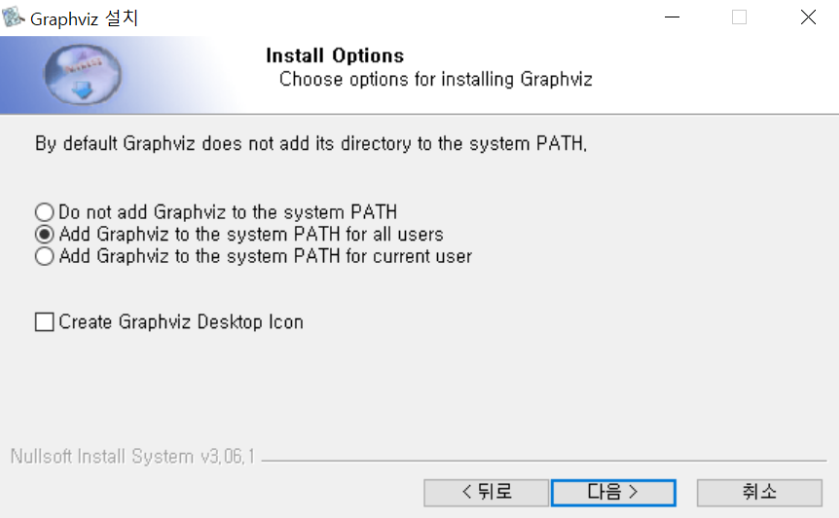

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, class_names=['0','1'], filled=True, out_file='tree_dot.dot')

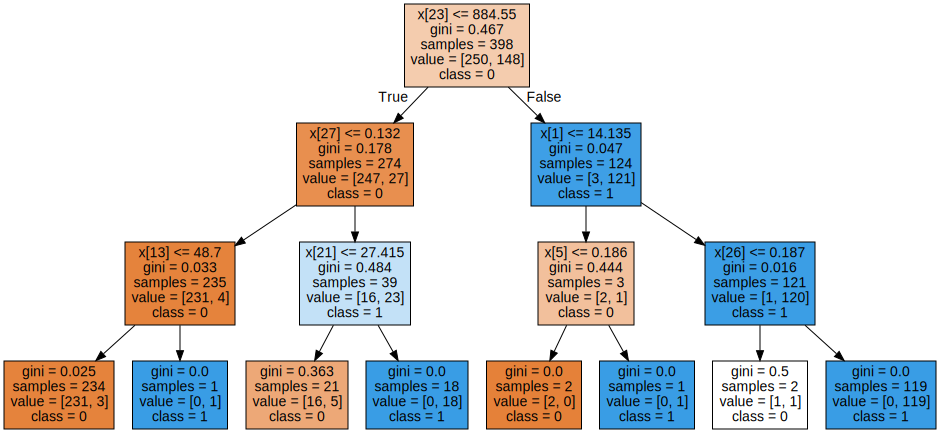

In [ ]:
import os
import graphviz
from IPython.display import display
with open(r'tree_dot.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

**최적의 하이퍼 파라미터 찾기: 그리드 서치**

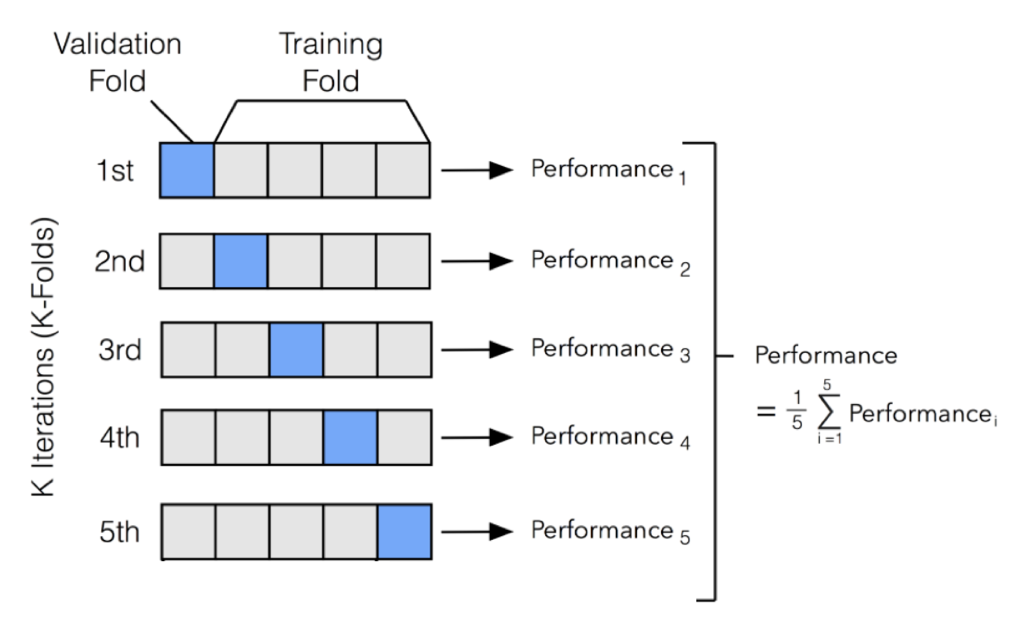

Gridsearch: 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법. <br> 즉, 우리에게 필요한 최적의 하이퍼 파라미터를 찾아준다 <br>
ex) max_depth를 몇으로 설정하는게 좋은지 등등 <br>

GridSearch는 확인하고 싶은 다양한 파라미터값을 넣어주면,
그것들을 하나씩 확인하면서 스코어를 내고, <br>
가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음


model_selection 모듈의 GridSearchCV 함수는 GridSearch + Cross validation의 약어로, <br>
k개의 폴드에 대해 최적의 하이퍼 파라미터를 모두 종합적으로 고려하여 최적의 파라미터를 출력한다. <br> 이때, 테스트하고자 하는 파라미터 값들을 사전(dictionary) 타입으로 정의해주어야 한다.

단점: 상대적으로 시간이 오래 걸린다

max_depth, min_samples_split에 대한 hyperparameter tuning을 실습해보자.

In [ ]:
from sklearn.model_selection import GridSearchCV

#테스트하고자 하는 파라미터 값들을 사전타입으로 정의
#max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparams = {'max_depth': list(range(2, 8)),
                  'min_samples_split': list(range(2, 20))}

GridCV = GridSearchCV(estimator = tree,
                      param_grid = hyperparams,
                      cv = 5)

GridCV.fit(X_train, y_train)

In [ ]:
#가장 좋은 성능을 보였을 때의 parameter
GridCV.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [ ]:
#위 파라미터로 했을 때 성능(평균 정확도)
GridCV.best_score_

0.934620253164557

In [ ]:
#위 파라미터 값들로 모델을 훈련시켜보자
tree_new = DecisionTreeClassifier(max_depth = 5,
                                  min_samples_split = 2,
                                  random_state = 10)
tree_new.fit(X_train, y_train)
tree_new_pred = tree_new.predict(X_test)

In [ ]:
#원래의 트리 성능

print("Decision Tree accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Decision Tree f1 score: {:.3f}".format(metrics.f1_score(y_test, y_pred)))

Decision Tree accuracy: 0.906
Decision Tree f1 score: 0.875


In [ ]:
#새로운 트리 성능

print("New Decision Tree accuracy: {:.3f}".format(metrics.accuracy_score(y_test, tree_new_pred)))
print("New Decision Tree f1 score: {:.3f}".format(metrics.f1_score(y_test, tree_new_pred)))

New Decision Tree accuracy: 0.930
New Decision Tree f1 score: 0.910


GridSearchCV로 최적의 하이퍼 파라미터를 찾았다. 성능이 보다 좋아진 것을 확인할 수 있다.

## Ensemble - Voting

Voting기법은, 하나의 train set을 가지고 여러 분류 모델을 만든 후 새로운 데이터에 대한 각 모델들의 예측값을 확인한다. 이후 voting을 통해 최종 결과값을 구한다.

아래 예시에서는 분류모델로 로지스틱 회귀, decision tree, KNN, SVM을 사용하였다.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate, cross_val_score, KFold


logistic = LogisticRegression(max_iter=10000)
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = LinearSVC()

voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

In [ ]:
#KFold 객체 생성
kfold = KFold(n_splits = 3,
              shuffle = True,
              random_state = 10)

#hard vote
hard_vote = VotingClassifier(estimators = voting_estimators,
                          voting = 'hard')
hard_vote_cv = cross_validate(hard_vote, X_train, y_train, cv = kfold)
hard_vote.fit(X_train, y_train)
hard_pred = hard_vote.predict(X_test)

#soft vote
soft_vote = VotingClassifier(estimators = voting_estimators,
                          voting = 'soft')
soft_vote_cv = cross_validate(soft_vote, X_train, y_train, cv = kfold)
soft_vote.fit(X_train, y_train)
soft_pred = soft_vote.predict(X_test)

In [ ]:
#Ensemble기법과 성능을 비교하기 위해 각 클래스도 따로 학습을 시켜준다.
logistic.fit(X_train, y_train)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

logi_pred = logistic.predict(X_test)
tree_pred = tree.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
a = print('logistic accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, logi_pred)))
b = print('tree accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, tree_pred)))
c = print('knn accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, knn_pred)))
d = print('svm accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, svm_pred)))
e = print('hard voting accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, hard_pred)))
f = print('soft voting accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, soft_pred)))

logistic accuracy:0.924
tree accuracy:0.906
knn accuracy:0.918
svm accuracy:0.912
hard voting accuracy:0.930
soft voting accuracy:0.918


무조건 ensemble의 성능이 가장 좋은 것은 아니다.

특히, soft voting은 평균을 내는 것이기 때문에 더 높은 성능의 모델이 존재한다. 다만 soft voting이 내는 결과가 대부분의 경우 합리적이기 때문에 의의가 있다.

## Ensemble - Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini',
                                n_estimators = 5,
                                random_state = 10)
#n_estimaotrs는 데이터 샘플을 몇 개까지 만들 것이냐는 의미이다.
#의사결정트리를 5개 만드는 것
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print('RandomForest accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, forest_pred)))

RandomForest accuracy:0.930


In [ ]:
#트리의 개수를 50개로 늘릴 경우
forest2 = RandomForestClassifier(criterion = 'gini',
                                 n_estimators = 50,
                                random_state = 10)
forest2.fit(X_train, y_train)
forest2_pred = forest2.predict(X_test)
print('RandomForest2 accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, forest2_pred)))

RandomForest2 accuracy:0.953


* 아래 코드는 실행하는 데에 5분 정도 걸립니다!

In [ ]:
#GridSearch로 최적의 파라미터 찾기
#이번에는 n_estimators까지 범위를 지정하는 것으로 hyperparameter를 수정해준다.
hyperparams2 = {'n_estimators': [10, 100, 500],
                'max_depth': list(range(2, 8)),
                'min_samples_split': list(range(2, 10))}

grid_forest = GridSearchCV(estimator = forest,
                      param_grid = hyperparams2,
                      cv = 5)
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=5, random_state=10),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 100, 500]})

In [ ]:
grid_forest.best_params_

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 10}

In [ ]:
grid_forest.best_score_

0.9673417721518988

**feature importances**

Random Forest의 각 피처의 중요도 시각화


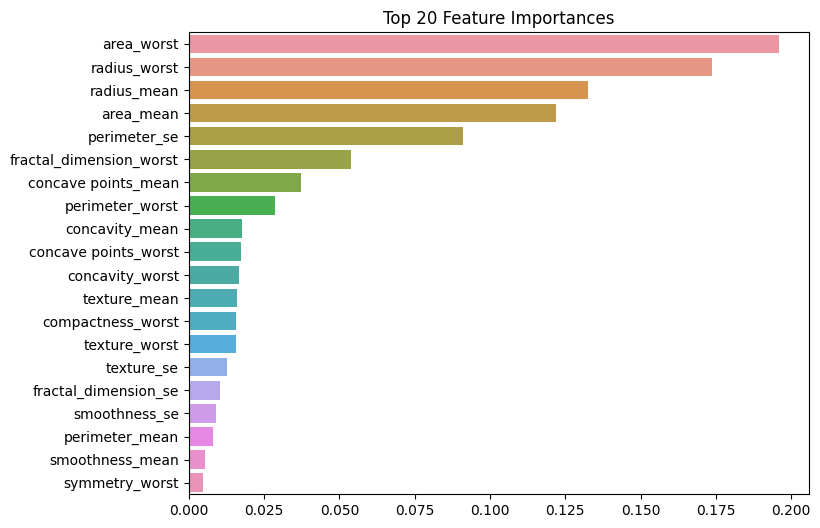

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = forest.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

## Ensemble - Boosting

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators = 5,
                              learning_rate = 0.1)

adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
print('Adaboost accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, adaboost_pred)))
print('Adaboost f1 score:{:.3f}'.format(metrics.f1_score(y_test, adaboost_pred)))

Adaboost accuracy:0.930
Adaboost f1 score:0.909


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost2 = AdaBoostClassifier(n_estimators = 50,
                              learning_rate = 0.1)

adaboost2.fit(X_train, y_train)
adaboost2_pred = adaboost2.predict(X_test)
print('Adaboost2 accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, adaboost2_pred)))
print('Adaboost2 f1 score:{:.3f}'.format(metrics.f1_score(y_test, adaboost2_pred)))

Adaboost2 accuracy:0.959
Adaboost2 f1 score:0.944


In [ ]:
hyperparams3 = {'n_estimators': [5, 10, 100],
                'learning_rate': [0.01, 0.1, 1]}

grid_adaboost = GridSearchCV(adaboost,
                             param_grid = hyperparams3,
                             cv = 5)
grid_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.1, n_estimators=5),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [5, 10, 100]})

In [ ]:
grid_adaboost.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [ ]:
grid_adaboost.best_score_

0.9723417721518987

Gradient Boosting Machine(GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)

print('GBM accuracy:{:.3f}'.format(metrics.accuracy_score(y_test,gbm_pred)))
print('GBM f1 score:{:.3f}'.format(metrics.f1_score(y_test,gbm_pred)))

GBM accuracy:0.947
GBM f1 score:0.930


In [ ]:
hyperparams4 = {'n_estimators': [5, 10, 100],
                'max_depth': list(range(2, 8)),
                'min_samples_split': list(range(2, 10))}

grid_gbm = GridSearchCV(gbm,
                      param_grid = hyperparams4,
                      cv = 5)
grid_gbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [5, 10, 100]})

In [ ]:
grid_gbm.best_params_

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
grid_gbm.best_score_

0.9722784810126583

# Confusion Matrix를 사용한 성능 평가(시각화)

Confusion Matrix: Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
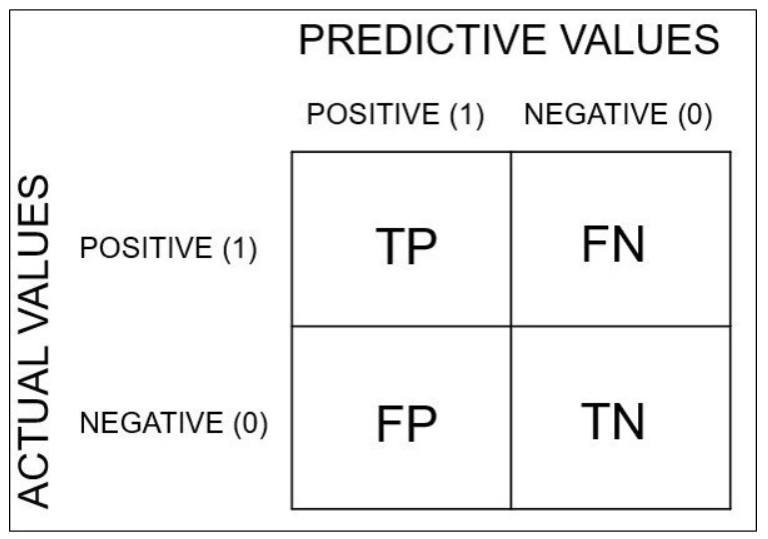

Actual Values는 실제값, Predictive Values는 예측값을 의미한다.

TP: 실제 True인 정답을 True라고 예측 (정답)<br>
FP: 실제 False인 정답을 True라고 예측 (오답)<br>
FN: 실제 True인 정답을 False라고 예측 (오답)<br>
TN: 실제 False인 정답을 False라고 예측 (정답)

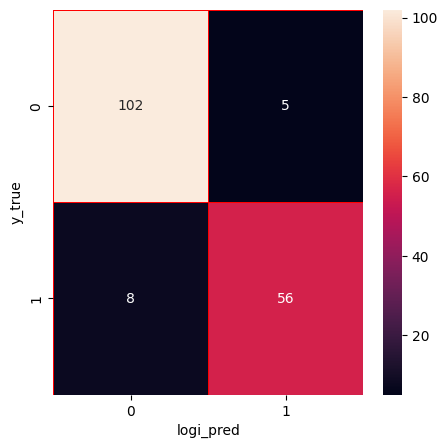

In [ ]:
from sklearn.metrics import confusion_matrix
#Logistic Regression
y_true = y_test
logi_cm = confusion_matrix(y_true, logi_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(logi_cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("logi_pred")
plt.ylabel("y_true")
plt.show()

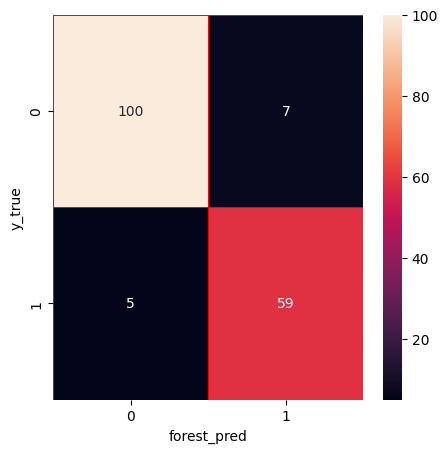

In [ ]:
#Random Forest
y_true = y_test
forest_cm = confusion_matrix(y_true, forest_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(forest_cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("forest_pred")
plt.ylabel("y_true")
plt.show()

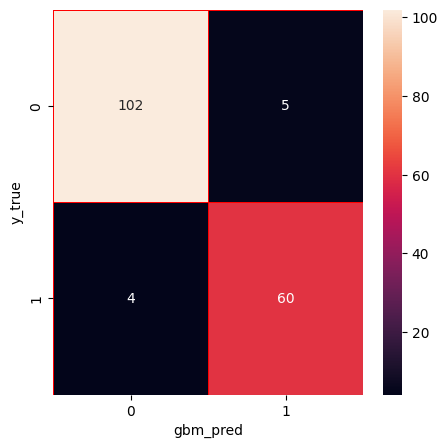

In [ ]:
#GBM
y_true = y_test
gbm_cm = confusion_matrix(y_true, gbm_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(gbm_cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("gbm_pred")
plt.ylabel("y_true")
plt.show()

참고문헌:
8기 장준혁님 코딩 실습 자료

https://injo.tistory.com/30

https://www.inflearn.com/questions/110501/random-state-%EC%A7%88%EB%AC%B8

https://blog.naver.com/PostView.naver?blogId=siniphia&logNo=221396370872

https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score